In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interface import config

from lib.tests import pad_delay_wrapper, mimo_pad_wrapper, mimo_convolve_wrapper, mimo_lerp_wrapper, mimo_hybrid_convolve_wrapper
from lib.directions import calculate_coefficients, calculate_delays


In [ ]:
# whole_samples, adaptive_array = calculate_coefficients()
# samp_delay = calculate_delays()

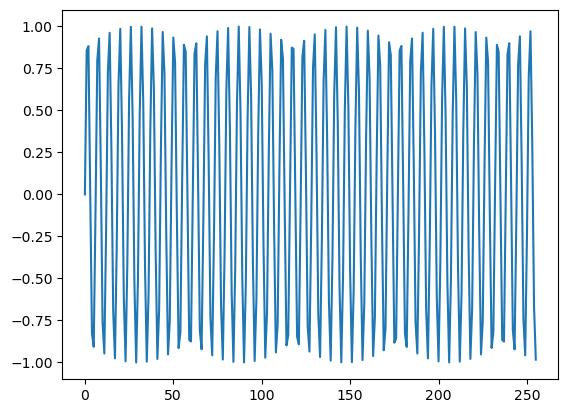

In [2]:
def generate_sig(frequency):
    start_time = 0
    end_time = 1
    sample_rate = config.fs
    time = np.arange(start_time, end_time, 1/sample_rate)
    theta = 0
    amplitude = 1
    sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)[:config.N_SAMPLES]
    return sinewave


def generate_signals_all(signal: np.ndarray):
    signals = np.repeat(signal, config.N_MICROPHONES, axis=0).reshape((config.N_SAMPLES, config.N_MICROPHONES)).T
    return np.float32(signals)

signal = generate_sig(8000)

signals = generate_signals_all(signal)

plt.plot(signals[0,:])


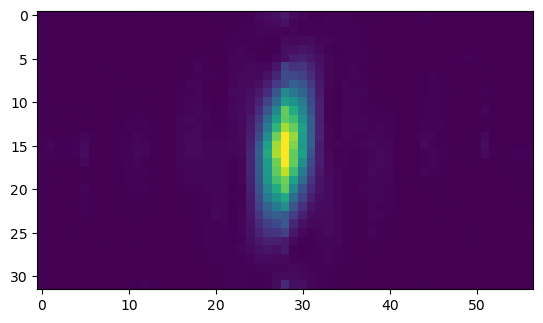

In [3]:
a = mimo_pad_wrapper(signals)
plt.imshow(a.T)

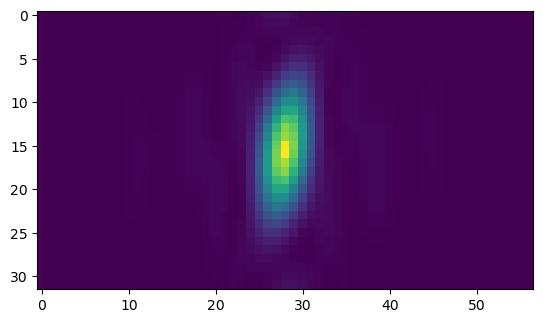

In [4]:
c = mimo_lerp_wrapper(signals)
plt.imshow(c.T)

In [5]:
d = mimo_hybrid_convolve_wrapper(signals)
plt.imshow(d.T)

: 

: 

In [ ]:
# DO NOT USE AT THE MOMENT
b = mimo_convolve_wrapper(signals)
plt.imshow(b.T)

In [ ]:

signal = generate_sig(5000)[1:101]

def delay(signal, h, offset: int=0):
    out = np.zeros_like(signal)

    for i in range(len(signal) - offset - 1):
        # out[offset + i + 1] += signal[i] + (1 - h) * (signal[i + 1] - signal[i])
        out[offset + i + 1] += signal[i + 1] - h * (signal[i + 1] - signal[i])
    # out[0] = signal[0]
    
    return out

plt.plot(signal, label="Signal")
plt.plot(delay(signal, 0.99, 0), label="Delay")
plt.legend()